### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [73]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


### Collect Data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [75]:
train_images.shape

(60000, 28, 28)

In [76]:
len(train_labels)

60000

In [77]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [78]:
test_images.shape

(10000, 28, 28)

In [79]:
len(test_labels)

10000

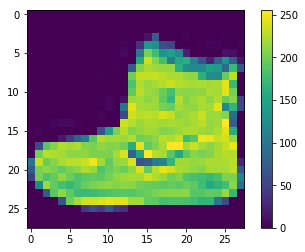

In [80]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
train_labels1=tf.keras.utils.to_categorical(train_labels)
test_labels1=tf.keras.utils.to_categorical(test_labels)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

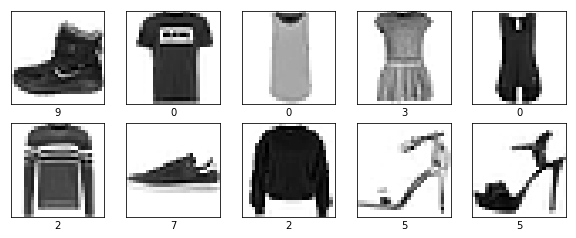

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

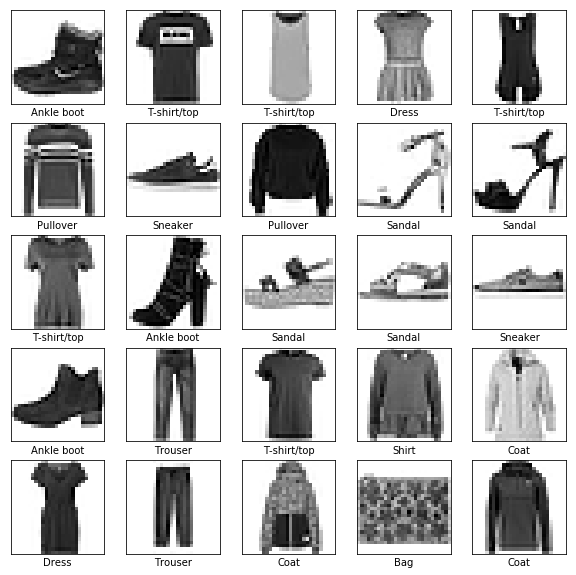

In [84]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
Model_Accuracy=[]

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

### Execute the model using model.fit()

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.7274 - accuracy: 0.7630
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5115 - accuracy: 0.8266
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4664 - accuracy: 0.8393
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4423 - accuracy: 0.8471
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4250 - accuracy: 0.8528
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4098 - accuracy: 0.8584
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3999 - accuracy: 0.8610
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3892 - accuracy: 0.8648
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3811 - accuracy: 0.8684
Epoch 10/10
60

In [87]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
# Test on unseen data

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.3519 - accuracy: 0.8553

Test accuracy: 0.8553


In [89]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

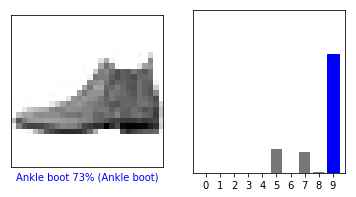

In [91]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

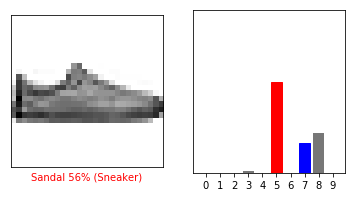

In [92]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

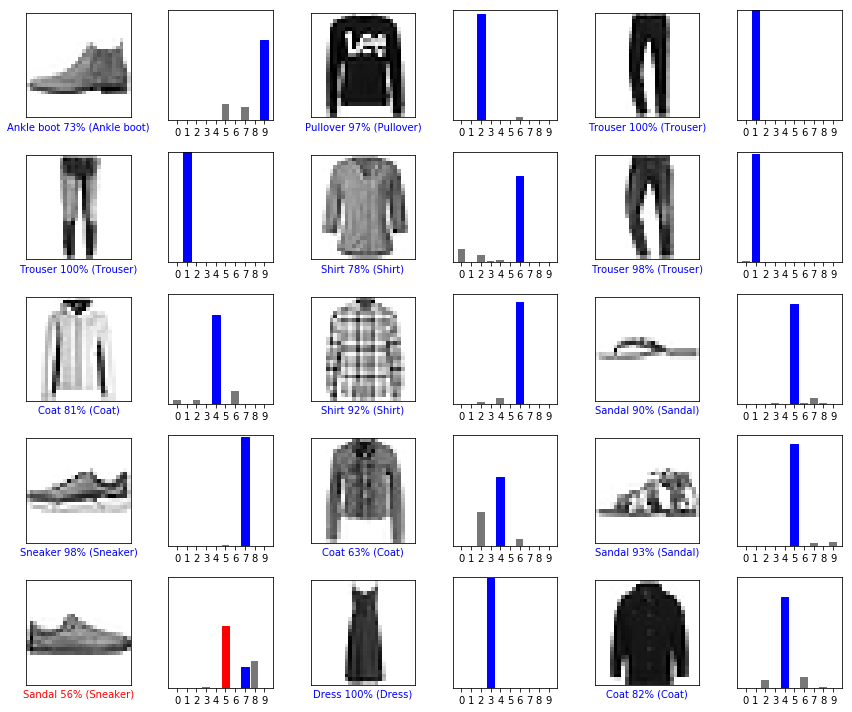

In [93]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [94]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [95]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [96]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.6946938e-04 4.9543422e-07 9.6660668e-01 8.0448935e-06 4.1619428e-03
  4.9049903e-10 2.8736403e-02 2.0468337e-11 1.7063052e-05 1.6407645e-10]]


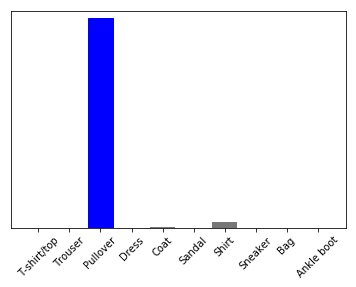

In [97]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [98]:
np.argmax(predictions_single[0])

2

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [99]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.5571 - accuracy: 0.8046
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4190 - accuracy: 0.8497
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3843 - accuracy: 0.8619
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3598 - accuracy: 0.8718
Epoch 5/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3421 - accuracy: 0.8762
Epoch 6/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3293 - accuracy: 0.8812
Epoch 7/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3168 - accuracy: 0.8849
Epoch 8/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3086 - accuracy: 0.8885
Epoch 9/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3000 - accuracy: 0.8923
Epoch

In [100]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________
None


### Execute the model

In [101]:
# Test on unseen data

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2365 - accuracy: 0.8737

Test accuracy: 0.8737


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras import optimizers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [129]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5562 - accuracy: 0.8044
Epoch 2/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4160 - accuracy: 0.8514
Epoch 3/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3794 - accuracy: 0.8646
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3592 - accuracy: 0.8710
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3415 - accuracy: 0.8781
Epoch 6/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.3291 - accuracy: 0.8813
Epoch 7/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3181 - accuracy: 0.8847
Epoch 8/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3038 - accuracy: 0.8887
Epoch 9/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2970 - accuracy: 0.8919
Epoch

In [121]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dense_33 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________
None


In [122]:
# Test on unseen data

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2466 - accuracy: 0.8738

Test accuracy: 0.8738


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [125]:
from keras import optimizers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])
sgd = tf.keras.optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5572 - accuracy: 0.8029
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3963 - accuracy: 0.8563
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3552 - accuracy: 0.8716
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3323 - accuracy: 0.8787
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3151 - accuracy: 0.8837
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3004 - accuracy: 0.8899
Epoch 7/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2901 - accuracy: 0.8928
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2774 - accuracy: 0.8972
Epoch 9/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2700 - accuracy: 0.8991
Epoch 10/10

## Review model

In [126]:
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 784)               3136      
_________________________________________________________________
dense_41 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_42 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________
None


### Run the model

In [127]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2146 - accuracy: 0.8819

Test accuracy: 0.8819


In [108]:
predictions = model.predict(test_images)
predictions[0]
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

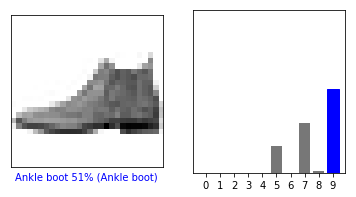

In [110]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

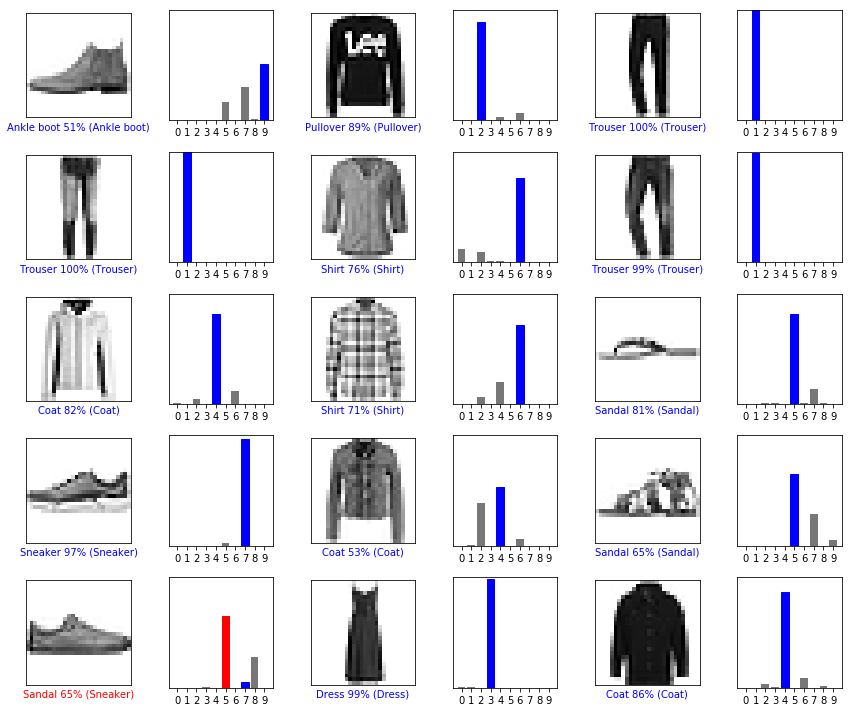

In [111]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Model 1 - with  default SGD optimizer, no batch normalisation, 2 dense layers
Accuracy : 0.8553
# Model 2 - with  SGD optimizer with default learning rate with batch  optimsation
Accuracy : 0.8737
# Model 3 - with  SGD optimizer with 0.001 learning rate with batch  optimsation
Accuracy : 0.8738
# Model 4 -  Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03
Accuracy : 0.8819

# Model 4 is giving better results with 88.14% accuracy